# 1 .Convolutional RGB Auto encoder 

CNN Auto Encoder for KITT data sets

In [102]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from process_data import  process_data
batch_size=20
num_epochs=100
hidden_size=1024
RESTORE=0
SEED = None
%matplotlib inline 
# display inline

In [103]:
data=np.load('../rgb_data.npy')
data=np.transpose(data,(0,2,1,3))# swap the two dimensions
print(data.shape)

(30602, 18, 60, 3)


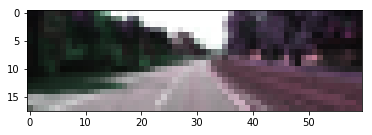

In [104]:
plt.imshow(data[0])# shape (18,60,3)

In [105]:
inputs= tf.placeholder(tf.float32, (None, 18,60,3), name="input")
outputs=tf.placeholder(tf.float32, (None, 18,60,3), name="ouput")

In [106]:
### Encoder use high level module 
conv1=tf.layers.conv2d(inputs=inputs,filters=16,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
#now (batch,18,60,16)

pool1=tf.layers.max_pooling2d(conv1,pool_size=(2,2),strides=(2,2),padding='same')
#now (batch,9,30,16)

conv2=tf.layers.conv2d(inputs=pool1,filters=8,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
# now (batch,9,30,8)

pool2=tf.layers.max_pooling2d(conv2,pool_size=(2,2),strides=(2,2),padding='same')
#now (batch,5,15,8)
#########################################################################################

### Decoder using high level modules 
upsample1=tf.image.resize_images(pool2,size=(9,30),
                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# now (batch,9,30,8)
conv4=tf.layers.conv2d(inputs=upsample1,filters=16,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
#now (batch,9,30,8)

upsample2 = tf.image.resize_images(conv4, size=(18,60),
                                   method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
#now (batch,18,60,8)
out=tf.layers.conv2d(inputs=upsample2,filters=3,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)

In [107]:
# define loss
learning_rate=1e-3
loss=tf.nn.l2_loss(out-outputs)
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss)

init=tf.global_variables_initializer()

In [108]:
train_size=data.shape[0]
train_indices=range(train_size)

Epoch: 0... Training loss: 246.5536
Epoch: 1... Training loss: 261.4155
Epoch: 2... Training loss: 226.6541
Epoch: 3... Training loss: 206.7467
Epoch: 4... Training loss: 187.4369
Epoch: 5... Training loss: 179.2553
Epoch: 6... Training loss: 181.8530
Epoch: 7... Training loss: 212.8387
Epoch: 8... Training loss: 185.7000
Epoch: 9... Training loss: 193.2787
Epoch: 10... Training loss: 206.2954
Epoch: 11... Training loss: 174.7063
Epoch: 12... Training loss: 199.6790
Epoch: 13... Training loss: 185.9138
Epoch: 14... Training loss: 165.7083
Epoch: 15... Training loss: 193.7622
Epoch: 16... Training loss: 171.1837
Epoch: 17... Training loss: 196.3427
Epoch: 18... Training loss: 182.2139
Epoch: 19... Training loss: 173.4208
Epoch: 20... Training loss: 172.3999
Epoch: 21... Training loss: 172.1098
Epoch: 22... Training loss: 161.1723
Epoch: 23... Training loss: 152.4801
Epoch: 24... Training loss: 167.7528
Epoch: 25... Training loss: 160.6401
Epoch: 26... Training loss: 171.3430
Epoch: 27..

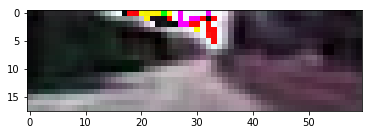

In [111]:
# training process
with tf.Session() as sess:
    sess.run(init)
    for ipochs in range(30):
        perm_indices=np.random.permutation(train_indices)
        for step in range(int(train_size/batch_size)):
            offset=(step*batch_size)%(train_size-batch_size)
            batch_indices=perm_indices[offset:(offset+batch_size)]
            
            l,_=sess.run([loss,optimizer],feed_dict={inputs:data[batch_indices],
                                                     outputs:data[batch_indices]})
            
        print("Epoch: {}...".format(ipochs),
                       "Training loss: {:.4f}".format(l))
            
#test on reconstruction  

    reconstruction=sess.run(out,feed_dict={inputs:data[0:1]})
    
plt.imshow(reconstruction[0])